In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


**Subplots**

***subplots():*** Create multiple plots within a single figure.
Returns two objects:
1. fig - represents the entire figure window that will contain all the subplots.
2. ax - either a single axis object (for a single subplot) or an array of axis objects (for multiple subplots).
***Arguments:***
1. nrows and ncols determine the number of rows and columns of subplots, respectively.
2. sharex and sharey control whether the x-axes or y-axes should be shared among subplots.
***Syntax:*** fig, ax = plt.subplots(nrows, ncols)
E.g. fig, ax = plt.subplots(1,2) - Creates a figure with 1 row and 2 columns of subplots.

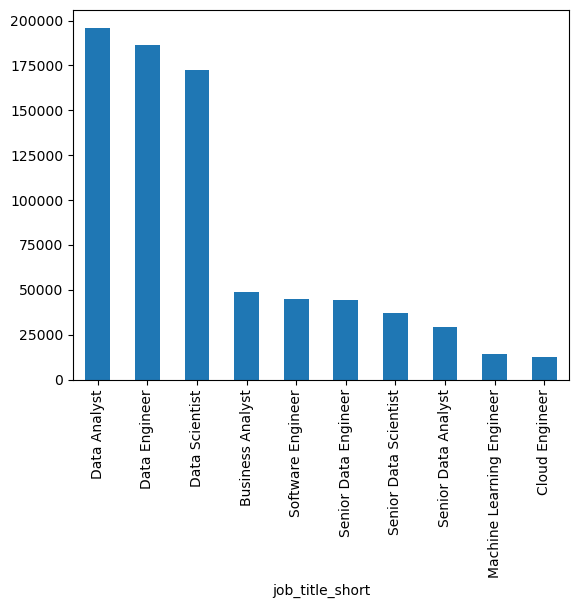

In [2]:
# create a simple subplot
fig, ax = plt.subplots()

# plot the data
df['job_title_short'].value_counts().plot(kind='bar', ax=ax)
plt.show()


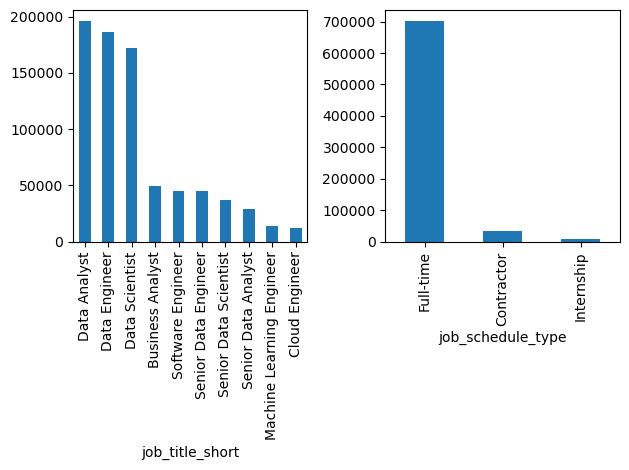

In [3]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

# fix the overlap
fig.tight_layout()

plt.show()


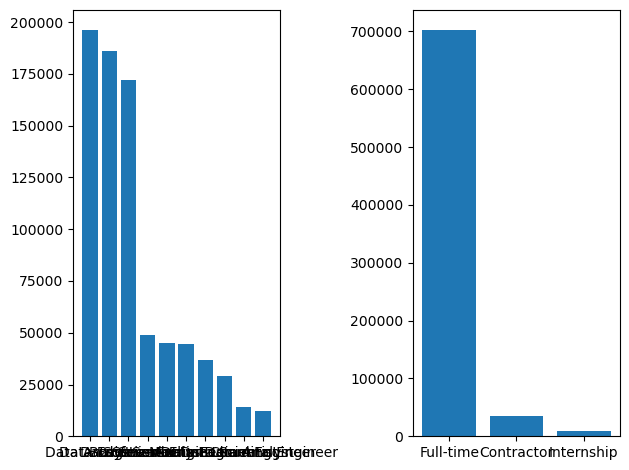

In [4]:
#Alternatively, we can plot how Matplotlib intended.
fig, ax = plt.subplots(1, 2)

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

fig.tight_layout()

plt.show()



**Counts of Top Skills in Job Postings**

In [5]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count


,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [6]:
#Get the top 3 job titles.
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = job_titles[:3]

job_titles


['Data Scientist', 'Data Engineer', 'Data Analyst']

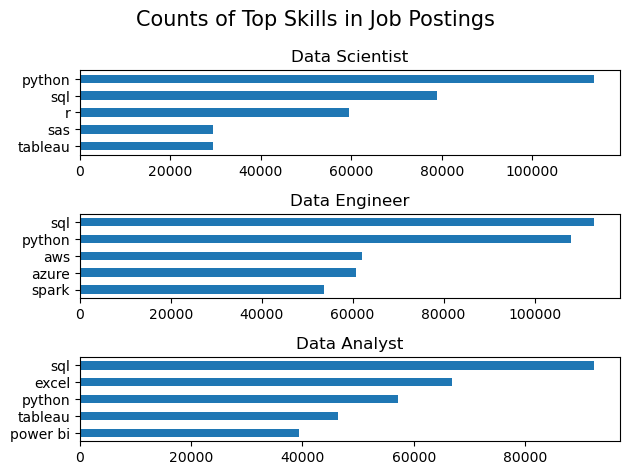

In [ ]:
#Plot these top jobs on the same plot.

fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    

fig.tight_layout()
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()
plt.show()
